In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv("DATABARANG2.csv")
x = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, -1].values

In [3]:
print(x)

[[     30   12000]
 [     70   20000]
 [     75 1500000]
 [     82 2400000]
 [     35 2730000]
 [     67 3120000]
 [     93 1000000]
 [    100  845000]]


In [4]:
print(y)

[0 1 1 1 0 0 1 0]


In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [6]:
print(x_train)

[[     70   20000]
 [    100  845000]
 [     82 2400000]
 [     30   12000]
 [     67 3120000]
 [     35 2730000]]


In [7]:
print(x_test)

[[     93 1000000]
 [     75 1500000]]


In [8]:
print(y_train)

[1 0 1 0 0 0]


In [9]:
print(y_test)

[1 1]


In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [11]:
print(x_train)

[[ 0.24286655 -1.17591385]
 [ 1.45719931 -0.52966387]
 [ 0.72859965  0.68841942]
 [-1.37624379 -1.18218052]
 [ 0.12143328  1.2524194 ]
 [-1.173855    0.94691941]]


In [12]:
print(x_test)

[[ 1.173855   -0.40824721]
 [ 0.44525534 -0.01658055]]


In [13]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [14]:
y_pred = classifier.predict(x_test)

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[0 0]
 [1 1]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


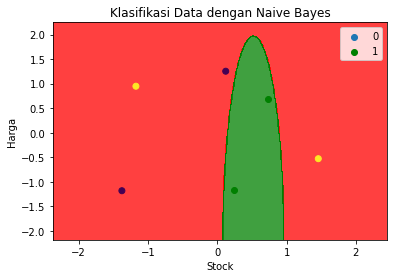

In [17]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 1].max() + 1, step=0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data dengan Naive Bayes')
plt.xlabel('Stock')
plt.ylabel('Harga')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


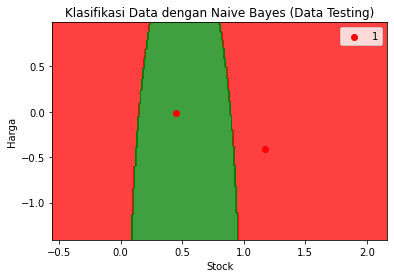

In [18]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 1].max() + 1, step=0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data dengan Naive Bayes (Data Testing)')
plt.xlabel('Stock')
plt.ylabel('Harga')
plt.legend()
plt.show()